### 딥-러닝 과정 CNN 

### 첫번째 실습. Keras 모델 생성/학습 - MNIST : MLP
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [10]:
# 1. 데이터 불러오기
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [11]:
# 2. 이미지 데이터 확인하기 🖼
x_train[0].shape

(28, 28)

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
y_train[0]

5

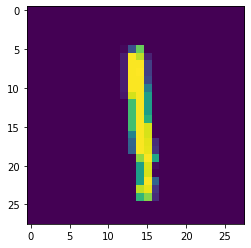

In [14]:
import matplotlib.pyplot as plt
# y_train_im = np.array(y_train[1])
plt.imshow(x_train[8])

In [15]:
y_train[0].shape

()

In [16]:
# # 3-1. 이미지 데이터 전처리 : 2차원->1차원 🌟🌟🌟

x_train= x_train.reshape(60000, 28, 28, 1)
x_train.shape
x_test = x_test.reshape(10000, 28, 28, 1)

In [17]:
# 3-2. 이미지 데이터 전처리 : Normalization 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(x_train)
# scaler.transform

x_train = x_train/255

In [18]:
# x_train[0]

In [19]:
x_test = x_test/255
# x_test[0]

In [20]:
# # 4. Label 전처리 (one-hot encoding) 
# print(y_train)
# y_train

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
x_train[0].shape

(28, 28, 1)

In [24]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [25]:
# 5. 모델 생성 : CNN 🌟🌟🌟

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [62]:
model = keras.Sequential()
model.add(Conv2D(input_shape = (x_train[0].shape), 
                 filters = 128, 
                 kernel_size = (5,5), 
                 strides = (1,1), 
                 padding = 'same')) # same 반대 validㅋ
model.add(Activation('relu'))
model.add(Conv2D(input_shape = (x_train[0].shape), 
                 filters = 256, 
                 kernel_size = (5,5), 
                 strides = (1,1), 
                 padding = 'same')) # same 반대 validㅋ
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# prior layer should be flattend to be connected to dense layers
model.add(Flatten())
# dense layer with 50 neurons
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))


In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 256)       819456    
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)              

In [64]:
from tensorflow.keras import optimizers


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [65]:
# 7. 모델 학습시키기
history = model.fit(x_train, y_train, epochs = 10, batch_size=512, validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 31s 305ms/step - loss: 0.3692 - accuracy: 0.8790 - val_loss: 0.0664 - val_accuracy: 0.9789
Epoch 2/10
94/94 [==============================] - 22s 233ms/step - loss: 0.0518 - accuracy: 0.9848 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 3/10
94/94 [==============================] - 22s 230ms/step - loss: 0.0298 - accuracy: 0.9910 - val_loss: 0.0455 - val_accuracy: 0.9876
Epoch 4/10
94/94 [==============================] - 21s 228ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 5/10
94/94 [==============================] - 22s 234ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0452 - val_accuracy: 0.9885
Epoch 6/10
94/94 [==============================] - 21s 227ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0494 - val_accuracy: 0.9872
Epoch 7/10
94/94 [==============================] - 22s 233ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0461 - val_accuracy: 0.9889

In [66]:
# 8. 모델 평가하기
train_result = model.evaluate(x_train, y_train)
test_result = model.evaluate(x_test, y_test)
print(train_result)
print(test_result)

313/313 [==============================] - 3s 10ms/step - loss: 0.0345 - accuracy: 0.9895
[0.011273317039012909, 0.996999979019165]
[0.03446880355477333, 0.9894999861717224]


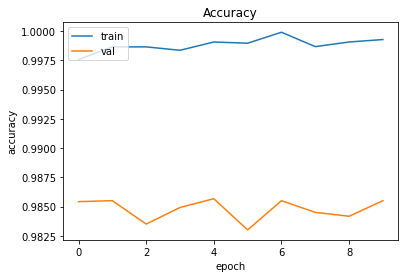

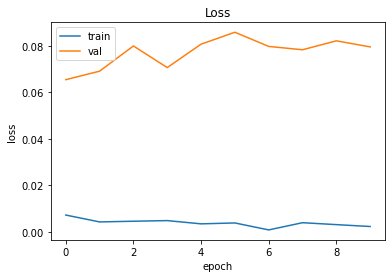

In [35]:
# 9. 학습 시각화하기
# 9. 학습 시각화하기

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

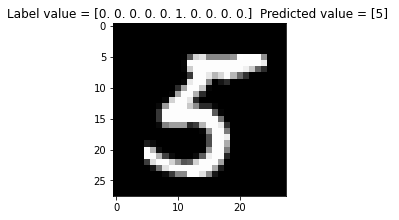

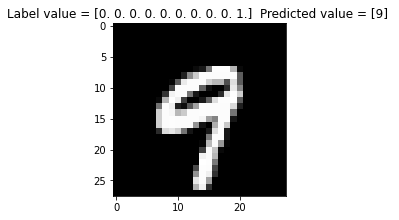

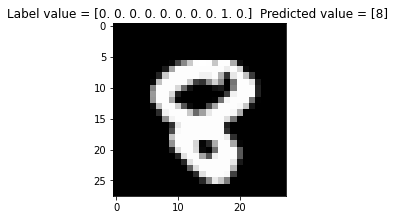

In [49]:
# 10. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = x_test[index].reshape(1, 28, 28, 1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = x_test
    plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()

In [36]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15060272827530721035,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7797735424
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1319891281139502175
 physical_device_desc: "device: 0, name: NVIDIA Tesla M60, pci bus id: 0001:00:00.0, compute capability: 5.2"]

In [68]:
model.save('tae.model.h5')